# Charts and Graph with Seaborn and others

# Table of contents

1)  With Matplotlib 

2)  With other libraries
- Seaborn
- Altair
- Bokeh

## 2) With other libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import datetime as dt


In [29]:
import pymysql
server = "analyst-toolbelt.cn119w37trlg.eu-west-1.rds.amazonaws.com"
username = "emlyon2"
password = "student2"
connection = pymysql.connect(host=server,
                             user=username,
                             password=password,
                             db='kickstarter',
                             charset='utf8')
SQL = "SELECT * FROM kickstarter.kickstarter"
kicks = pd.read_sql(SQL, connection)





In [4]:
df=pd.DataFrame({'start_date':list(Counter(kicks.start_date).keys()), 'Count':list(Counter(kicks.start_date).values())})
df.start_date=pd.to_datetime(df.start_date)
df['month']=df.start_date.dt.month
df['year']=df.start_date.dt.year
dfgp=df.groupby(["year",'month']).aggregate(sum)

In [5]:
connection = pymysql.connect(host=server,
                             user=username,
                             password=password,
                             db='videogames',
                             charset='utf8')
SQL = "SELECT * FROM videogames.sales"
videogames = pd.read_sql(SQL, connection)
videogames.Global_Sales=videogames.Global_Sales.replace('','0')
for i in [6,7,8,9,10]:
    videogames.iloc[:,i]=videogames.iloc[:,i].map(lambda x: float(x))


# Seaborn

In [6]:
import seaborn as sns

In [7]:
videogames.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


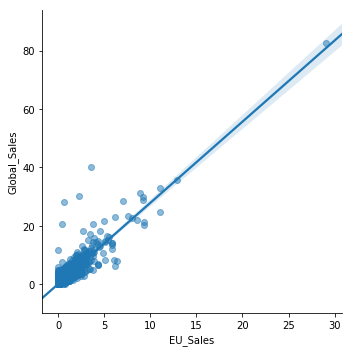

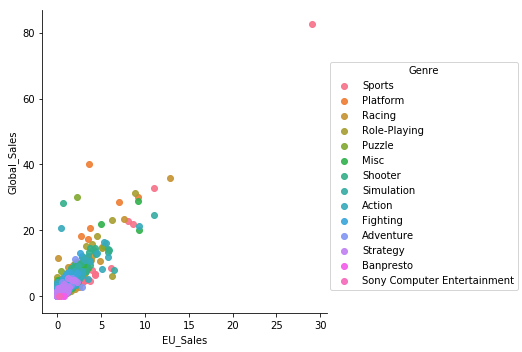

In [8]:
sns.lmplot(x='EU_Sales', y='Global_Sales', data=videogames,
           fit_reg=True, scatter_kws={'alpha':0.5})
sns.lmplot(x='EU_Sales', y='Global_Sales', data=videogames,
           fit_reg=False, 

           hue='Genre', scatter_kws={'alpha':0.9})

[Text(0,0,'Sports'),
 Text(0,0,'Platform'),
 Text(0,0,'Racing'),
 Text(0,0,'Role-Playing'),
 Text(0,0,'Puzzle'),
 Text(0,0,'Misc'),
 Text(0,0,'Shooter'),
 Text(0,0,'Simulation'),
 Text(0,0,'Action'),
 Text(0,0,'Fighting'),
 Text(0,0,'Adventure'),
 Text(0,0,'Strategy')]

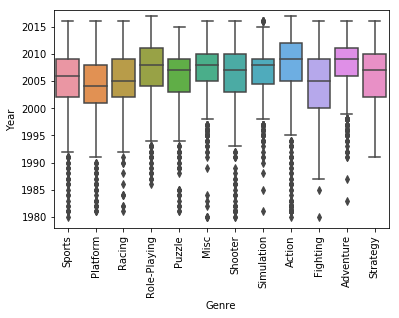

In [9]:
videogames.loc[videogames.Year==0, 'Genre']=np.nan
videgoames=videogames.dropna()
bp=sns.boxplot(data=videogames, x='Genre', y='Year')
axes = bp.axes
axes.set_ylim(1978,2018)
axes.set_xticklabels(videogames.Genre.unique(), rotation=90)

[Text(0,0,'Sports'),
 Text(0,0,'Platform'),
 Text(0,0,'Racing'),
 Text(0,0,'Role-Playing'),
 Text(0,0,'Puzzle'),
 Text(0,0,'Misc'),
 Text(0,0,'Shooter'),
 Text(0,0,'Simulation'),
 Text(0,0,'Action'),
 Text(0,0,'Fighting'),
 Text(0,0,'Adventure'),
 Text(0,0,'Strategy')]

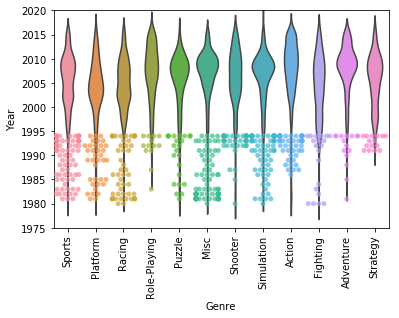

In [10]:

vp=sns.violinplot(data=videogames, x='Genre', y='Year', inner=None) # Remove the bars inside the violins




df=videogames.loc[videogames.Year<1995,:]
vp=sns.swarmplot(data=df, x='Genre', y='Year', 
              hue='Genre', # Make points black
              alpha=0.7)
vp.legend_.remove()

axes = vp.axes
axes.set_ylim(1975,2020)
axes.set_xticklabels(videogames.Genre.unique(), rotation=90)


[Text(0,0,'Sports'),
 Text(0,0,'Platform'),
 Text(0,0,'Racing'),
 Text(0,0,'Role-Playing'),
 Text(0,0,'Puzzle'),
 Text(0,0,'Misc'),
 Text(0,0,'Shooter'),
 Text(0,0,'Simulation'),
 Text(0,0,'Action'),
 Text(0,0,'Fighting'),
 Text(0,0,'Adventure'),
 Text(0,0,'Strategy')]

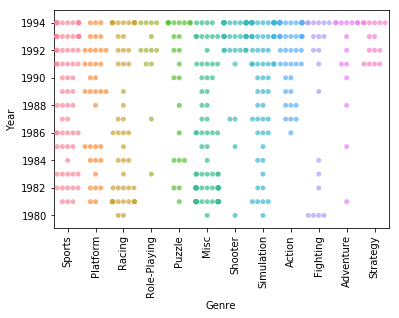

In [11]:
df=videogames.loc[videogames.Year<1995,:]
sp=sns.swarmplot(data=df, x='Genre', y='Year', 
              hue='Genre', # Make points black
              alpha=0.7)
sp.legend_.remove()

sp.set_xticklabels(videogames.Genre.unique(), rotation=90)


In [12]:
df=videogames.loc[(videogames.Genre.isin(['Sports','Racing','Action']))&(videogames.Year>2010),:].sample(100)

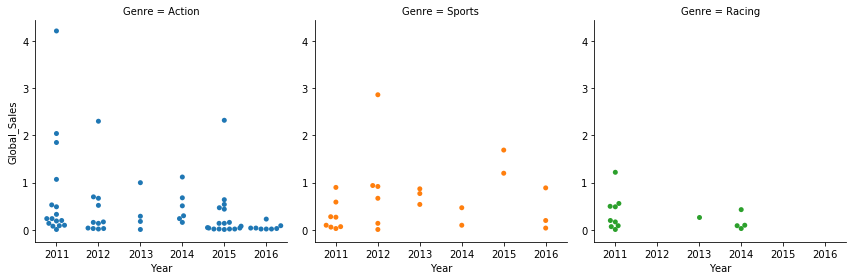

In [13]:

# Factor Plot
g = sns.factorplot(x='Year', 
                   y='Global_Sales', 
                   data=df, 
                   hue='Genre',  # Color by Genre
                   col='Genre',  # Separate by Genre
                   kind='swarm') # Swarmplot
 


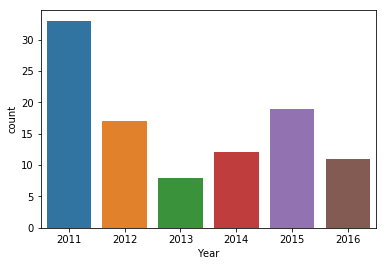

In [14]:
c=sns.countplot(x='Year', data=df)#, palette=pkmn_type_colors)


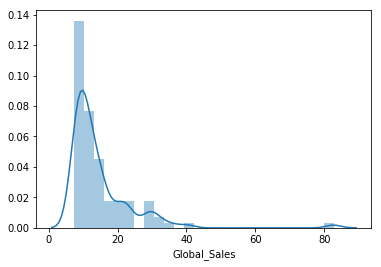

In [15]:
sns.distplot(videogames.loc[videogames.Rank<100,'Global_Sales'])


[(-1, 10), (-1, 10)]

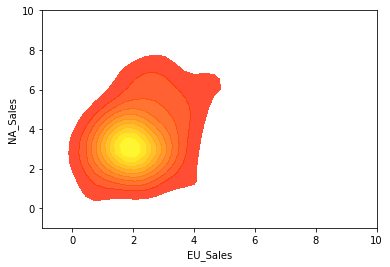

In [16]:
df=videogames.loc[videogames.Rank<200,:]
kp=sns.kdeplot(df.EU_Sales,df.NA_Sales,shade=True,shade_lowest=False,cmap="autumn", alpha=0.8)
kp.set(xlim=(-1,10),ylim=(-1, 10))
## bof , choisir un autre exemple ou l'enlever

In [17]:
kicks.head(1)

,platform,projectid,title,category,goal,amount_pledged,state,start_date,end_date,state_changed_at,location,founder,founder_date,backers_count,description,url,download_time,currency,currency_rate
0,Kickstarter,5971,An American Apocalypse: The Reckoning,Comics,48000,376,failed,2012-06-08,2012-08-06,2012-08-06,"Denver,Colorado",24486606,,7,A no-holds barred political satire that solves...,https://www.kickstarter.com/projects/jpeterane...,,,


In [18]:
kicks2=kicks.sample(1000)
kicks2.start_date=pd.to_datetime(kicks2.start_date)
kicks2.end_date=pd.to_datetime(kicks2.end_date)
kicks2['year']=kicks2.start_date.dt.year
kicks2=kicks2.loc[(kicks2.year<2014) & (kicks2.year>2010) & (kicks2.state.isin(['failed','successful'])),:]

(-1, 20000)

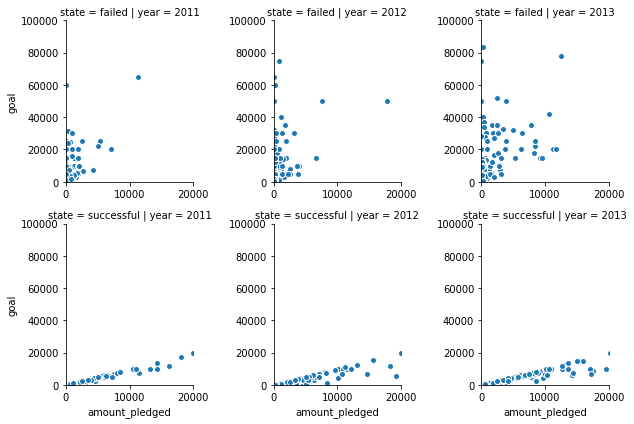

In [19]:
g = sns.FacetGrid(kicks2, col="year",  row="state")
g = g.map(plt.scatter, "amount_pledged", "goal", edgecolor="w")


axes = g.axes
#for ax in axes.flat:
#    for label in ax.get_xticklabels():
#        label.set_rotation(30)
axes[0,0].set_ylim(-1,100000)
axes[0,1].set_xlim(-1,20000)






# A changer  !

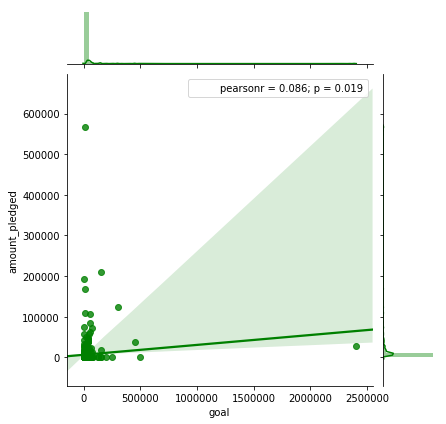

In [20]:
j=sns.jointplot(data=kicks2, x='goal', y='amount_pledged', kind='reg', color='g')


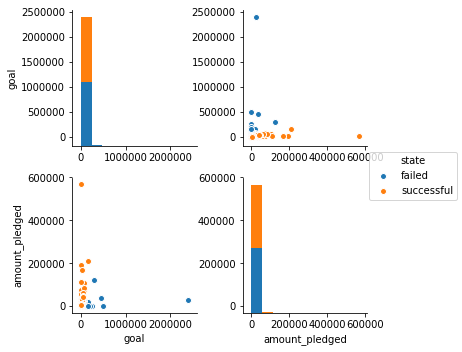

In [21]:

g = sns.pairplot(kicks2[['state','goal','amount_pledged']]  , hue="state", diag_kind="hist")



### How to implement statistical analysis in my plots ?

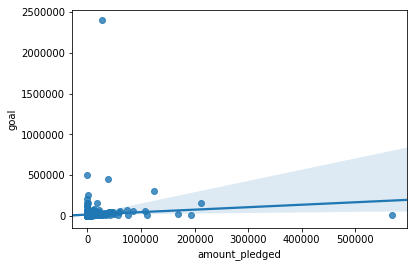

In [22]:
sns.regplot(x='amount_pledged',y='goal',data=kicks2)

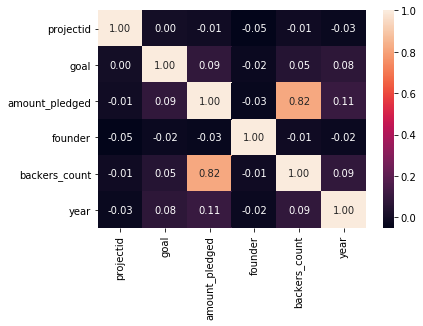

In [23]:
sns.heatmap(kicks2.corr(), annot=True, fmt=".2f")

## Examples 

http://seaborn.pydata.org/examples/index.html

## 2) With other libraries

### Altair

https://github.com/altair-viz/altair_widgets

altair-viz jakevdp github

### Bokeh

https://bokeh.pydata.org/en/latest/